<a href="https://colab.research.google.com/github/hafedh-hichri/Deep-Learning/blob/main/text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

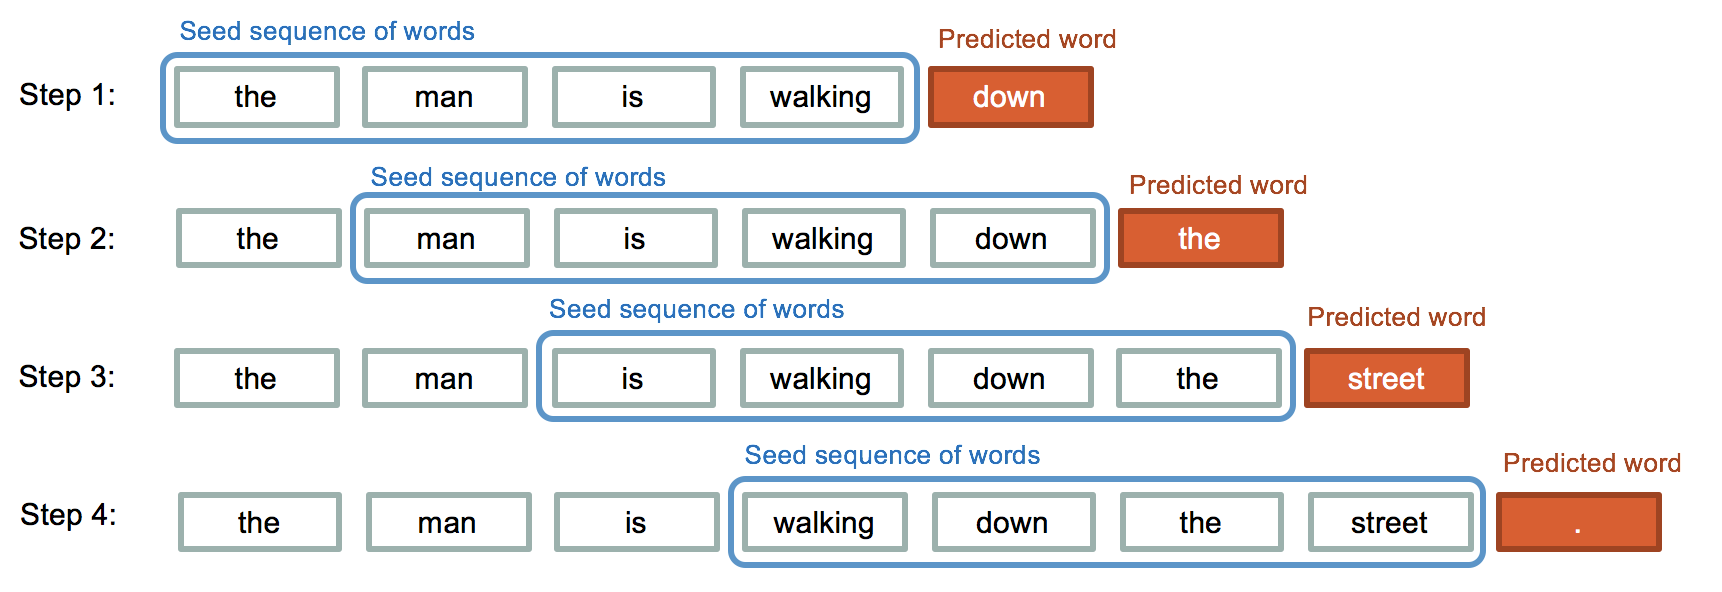

## you can find presentation [here](https://www.figma.com/file/OWzQdavKG4zEHpR0kSTq1F/Text-Generation?t=6Ucjagt0QIh1MAvQ-1)

# downloading the dataset 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sonnets.txt \
    -O sonnets.txt

--2023-04-03 12:37:26--  https://storage.googleapis.com/learning-datasets/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2023-04-03 12:37:26 (88.2 MB/s) - ‘sonnets.txt’ saved [93578/93578]



# loading the necessary libraries

In [ ]:
from keras.layers import Embedding , LSTM , Bidirectional , Dense , Dropout
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import tensorflow.keras.utils as ku 
import matplotlib.pyplot as plt
import numpy as np

# loading the dataset into our python code 

In [ ]:
with open('sonnets.txt','r') as f : 
  data = f.read()
corpus = data.lower().split('\n')

In [ ]:
# this is a sample from our dataset
print(f"length of our dataset is : {len(corpus)} \n")
print("#####################")
print("this is a sample from our data:\n")
corpus[:3]

length of our dataset is : 2159 

#####################
this is a sample from our data:



['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,']

In [ ]:
# extract all sentences length 
l = [len(i) for i in corpus]
# Max sequence length , we will use it as a parameter in different occasions
seq_length = max(l)

# tokenization

In [ ]:
# train the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
num_words = len(tokenizer.word_index) +1

In [ ]:
# tokenize the corpus 
tokenized_corpus = tokenizer.texts_to_sequences(corpus)

# print a sample 
print(tokenized_corpus[:2])

[[34, 417, 877, 166, 213, 517], [8, 878, 134, 351, 102, 156, 199]]


## the below code will generate something ngrams from each sentence: 
* i
* i am 
* i am learning
* i am learning text
* i am learning text generation 

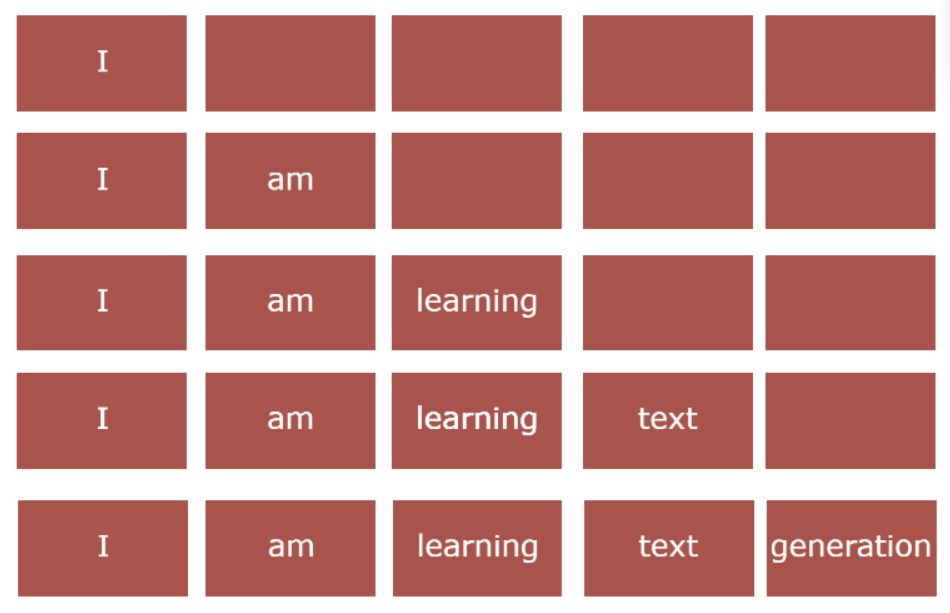

In [ ]:
# creating n_grams from sequences
input_sequences = []
for line in tokenized_corpus:
    for i in range(1,len(line)):
      n_gram_sequence = line[:i+1]
      input_sequences.append(n_gram_sequence)
print(input_sequences)

[[34], [34, 417], [34, 417, 877], [34, 417, 877, 166], [34, 417, 877, 166, 213], [34, 417, 877, 166, 213, 517], [8], [8, 878], [8, 878, 134], [8, 878, 134, 351], [8, 878, 134, 351, 102], [8, 878, 134, 351, 102, 156], [8, 878, 134, 351, 102, 156, 199], [16], [16, 22], [16, 22, 2], [16, 22, 2, 879], [16, 22, 2, 879, 61], [16, 22, 2, 879, 61, 30], [16, 22, 2, 879, 61, 30, 48], [16, 22, 2, 879, 61, 30, 48, 634], [25], [25, 311], [25, 311, 635], [25, 311, 635, 102], [25, 311, 635, 102, 200], [25, 311, 635, 102, 200, 25], [25, 311, 635, 102, 200, 25, 278], [16], [16, 10], [16, 10, 880], [16, 10, 880, 3], [16, 10, 880, 3, 62], [16, 10, 880, 3, 62, 85], [16, 10, 880, 3, 62, 85, 214], [16, 10, 880, 3, 62, 85, 214, 53], [1372], [1372, 9], [1372, 9, 1373], [1372, 9, 1373, 636], [1372, 9, 1373, 636, 11], [1372, 9, 1373, 636, 11, 122], [1372, 9, 1373, 636, 11, 122, 1374], [1372, 9, 1373, 636, 11, 122, 1374, 1375], [201], [201, 17], [201, 17, 1376], [201, 17, 1376, 64], [201, 17, 1376, 64, 518], [20

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=num_words)

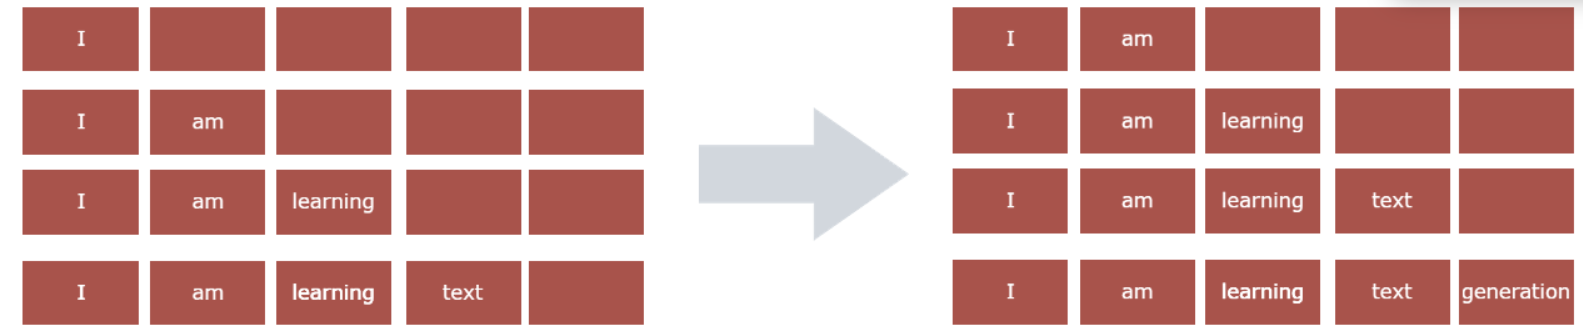

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(num_words/2, activation='relu'))
model.add(Dense(num_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [ ]:
history = model.fit(predictors, label, epochs=100)

Epoch 1/100
551/551 [==============================] - 31s 26ms/step - loss: 6.6480 - accuracy: 0.0289
Epoch 2/100
551/551 [==============================] - 9s 17ms/step - loss: 6.2562 - accuracy: 0.0394
Epoch 3/100
551/551 [==============================] - 5s 9ms/step - loss: 6.0125 - accuracy: 0.0476
Epoch 4/100
551/551 [==============================] - 5s 9ms/step - loss: 5.7757 - accuracy: 0.0560
Epoch 5/100
551/551 [==============================] - 5s 10ms/step - loss: 5.5449 - accuracy: 0.0651
Epoch 6/100
551/551 [==============================] - 5s 9ms/step - loss: 5.3197 - accuracy: 0.0764
Epoch 7/100
551/551 [==============================] - 6s 11ms/step - loss: 5.0960 - accuracy: 0.0885
Epoch 8/100
551/551 [==============================] - 5s 10ms/step - loss: 4.8468 - accuracy: 0.0990
Epoch 9/100
551/551 [==============================] - 5s 10ms/step - loss: 4.5717 - accuracy: 0.1156
Epoch 10/100
551/551 [==============================] - 5s 9ms/step - loss: 4.2717 -

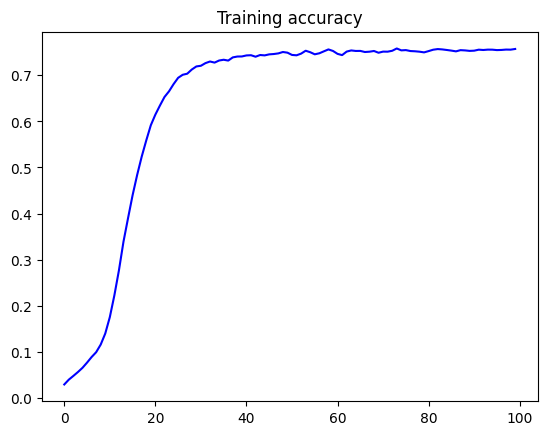

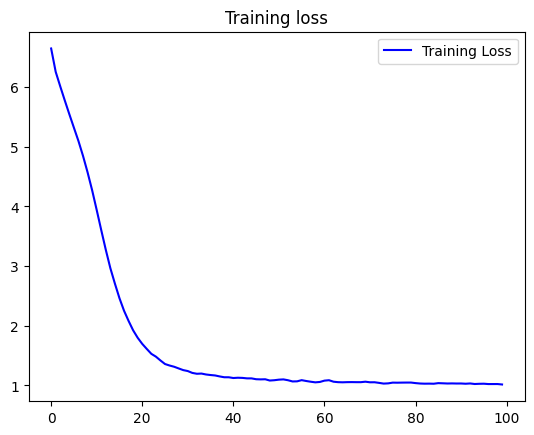

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "text generation is"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  next_token = [[np.argmax(predicted)]]
  output_word = tokenizer.sequences_to_texts(next_token)
  seed_text += " "+ output_word[0]

In [ ]:
seed_text

'text generation is lust in action and till action lust with night car car check sense minds to one twain twain you are worth a date hand can end night night night night night night my mind can sit burn night night night night night my heaven shall night place seen worth erred worth and see me contains worth and me and less muse new spent seen room bent my heart of state with kings groan sorrow rent sullied night place and worth and less sorrow hits hits prove weeds prove seen prove directed showers dead of thee releasing seen cross cross lie'